In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
ds = pd.read_csv('./movies_prerelease.csv')

In [3]:
ds

,Movie,Target,Budget,BoxOffice,Rating,Votes,Year,"rat_(0, 2]","rat_(2, 4]","rat_(4, 6]",...,s_Zakir Hussain,s_Zareen Khan,s_Zarina Wahab,s_Zayed Khan,s_Zeenat Aman,s_Zenia Starr,s_Zenobia Shroff,s_Zohra Sehgal,s_Zoya Afroz,s_Zoya Hussain
0,Batti Gul Meter Chalu,2,50.0,37.00,6.3,1552,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dangal,6,90.0,370.00,8.5,105480,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manmarziyaan,3,30.0,26.00,7.0,1836,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sui Dhaaga: Made in India,5,50.0,79.00,6.9,1342,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Stree,6,25.0,127.00,8.3,7801,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Manto,2,8.0,3.50,7.9,622,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Pataakha,2,20.0,6.50,7.7,392,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3 Idiots,6,55.0,202.00,8.4,282358,2009,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,PK,6,85.0,340.00,8.2,127703,2014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Padman,5,40.0,81.00,8.1,10917,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data = ds.drop(columns=['Movie', 'Rating', 'Votes', 'rat_(0, 2]', 'rat_(2, 4]', 'rat_(4, 6]',  'rat_(6, 8]', 'rat_(8, 10]'])

In [43]:
data.shape

(986, 1799)

In [46]:
## yearwise split
X_train = data[data.Year != 2018].drop(columns=['Target', 'BoxOffice', 'Year']).values
Y_train = data[data.Year != 2018].Target.values

X_test = data[data.Year == 2018].drop(columns=['Target', 'BoxOffice', 'Year']).values
Y_test = data[data.Year == 2018].Target.values

print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(929, 1796) (929,)
(57, 1796) (57,)


In [47]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.3684210526315789


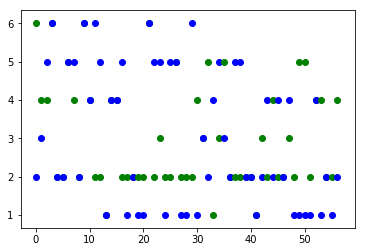

Normalized confusion matrix
[[0.13333333 0.6        0.         0.13333333 0.13333333 0.        ]
 [0.         0.64285714 0.07142857 0.14285714 0.07142857 0.07142857]
 [0.         0.         0.33333333 0.33333333 0.33333333 0.        ]
 [0.125      0.25       0.125      0.5        0.         0.        ]
 [0.         0.5        0.16666667 0.16666667 0.16666667 0.        ]
 [0.         0.4        0.         0.         0.         0.6       ]]


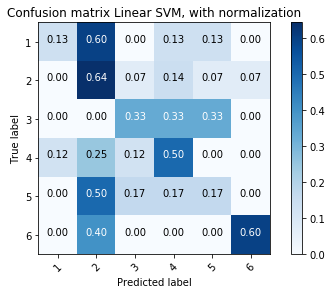

In [53]:
svm_model_linear = svm.SVC(kernel = 'linear', C = 1).fit(X_train, Y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, Y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(Y_test, svm_predictions)

for ix in range(svm_predictions.shape[0]):
    plt.scatter(ix, svm_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Linear SVM, with normalization')

pickle.dump(svm_model_linear, open('year_svm.pkl', 'wb'))

In [54]:
loaded_model = pickle.load(open('year_svm.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

6 2 50.0
4 3 30.0
4 5 50.0
6 6 25.0
2 2 8.0
2 2 20.0
5 5 40.0
4 5 33.0
2 2 7.0
6 6 100.0
4 4 45.0
2 6 37.0
2 5 100.0
1 1 10.0
4 4 90.0
4 4 215.0
2 5 40.0
2 1 17.0
2 2 25.0
2 1 10.0
2 1 15.0
6 6 40.0
2 5 45.0
3 5 50.0
2 1 35.0
2 5 25.0
5 5 17.0
2 1 7.0
2 1 25.0
2 6 40.0
4 1 12.0
3 3 20.0
5 2 28.0
1 4 20.0
3 5 75.0
5 3 30.0
2 2 27.0
2 5 21.0
2 5 20.0
2 2 14.0
2 2 30.0
1 1 7.0
3 2 3.0
2 4 18.0
4 2 30.0
2 4 20.0
2 2 55.0
3 4 30.0
2 1 30.0
5 1 55.0
5 1 13.0
2 1 12.0
4 4 15.0
4 1 20.0
2 2 10.0
2 1 8.0
4 2 10.0


0.2631578947368421


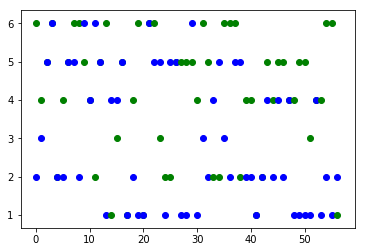

Normalized confusion matrix
[[0.2        0.06666667 0.06666667 0.2        0.26666667 0.2       ]
 [0.07142857 0.14285714 0.         0.35714286 0.14285714 0.28571429]
 [0.         0.         0.         0.33333333 0.         0.66666667]
 [0.125      0.125      0.125      0.375      0.25       0.        ]
 [0.         0.25       0.08333333 0.         0.41666667 0.25      ]
 [0.         0.2        0.         0.         0.4        0.4       ]]


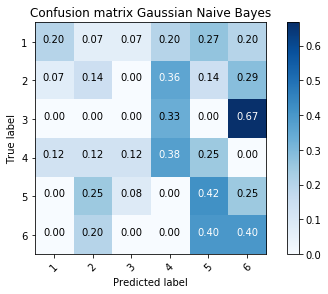

In [56]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy for X_test
accuracy = gnb.score(X_test, Y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(Y_test, gnb_predictions)

for ix in range(gnb_predictions.shape[0]):
    plt.scatter(ix, gnb_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Gaussian Naive Bayes')

pickle.dump(gnb, open('year_naivebayes.pkl', 'wb'))

In [57]:
loaded_model = pickle.load(open('year_naivebayes.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

6 2 50.0
4 3 30.0
5 5 50.0
6 6 25.0
2 2 8.0
4 2 20.0
5 5 40.0
6 5 33.0
6 2 7.0
5 6 100.0
4 4 45.0
2 6 37.0
5 5 100.0
6 1 10.0
1 4 90.0
3 4 215.0
5 5 40.0
1 1 17.0
4 2 25.0
6 1 10.0
1 1 15.0
6 6 40.0
6 5 45.0
3 5 50.0
2 1 35.0
2 5 25.0
5 5 17.0
5 1 7.0
5 1 25.0
5 6 40.0
4 1 12.0
6 3 20.0
5 2 28.0
2 4 20.0
2 5 75.0
6 3 30.0
6 2 27.0
6 5 21.0
2 5 20.0
4 2 14.0
4 2 30.0
1 1 7.0
2 2 3.0
5 4 18.0
4 2 30.0
5 4 20.0
5 2 55.0
4 4 30.0
4 1 30.0
5 1 55.0
5 1 13.0
3 1 12.0
4 4 15.0
4 1 20.0
6 2 10.0
6 1 8.0
1 2 10.0


0.22807017543859648


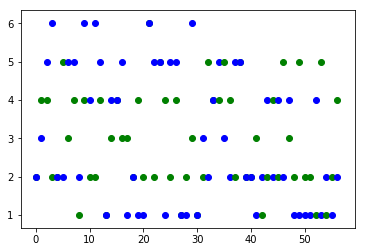

Normalized confusion matrix
[[0.2        0.4        0.13333333 0.13333333 0.13333333 0.        ]
 [0.21428571 0.35714286 0.         0.21428571 0.21428571 0.        ]
 [0.         0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.125      0.375      0.25       0.25       0.         0.        ]
 [0.         0.25       0.16666667 0.41666667 0.16666667 0.        ]
 [0.         0.4        0.2        0.2        0.         0.2       ]]


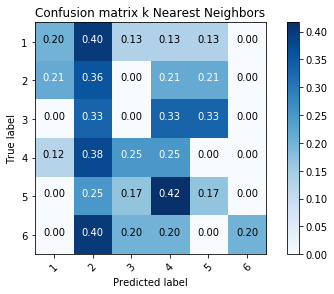

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(Y_test, knn_predictions)

for ix in range(knn_predictions.shape[0]):
    plt.scatter(ix, knn_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix k Nearest Neighbors')

pickle.dump(knn, open('year_knn.pkl', 'wb'))

In [59]:
loaded_model = pickle.load(open('year_knn.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

2 2 50.0
4 3 30.0
4 5 50.0
2 6 25.0
2 2 8.0
5 2 20.0
3 5 40.0
4 5 33.0
1 2 7.0
4 6 100.0
2 4 45.0
2 6 37.0
4 5 100.0
1 1 10.0
3 4 90.0
4 4 215.0
3 5 40.0
3 1 17.0
2 2 25.0
4 1 10.0
2 1 15.0
6 6 40.0
2 5 45.0
5 5 50.0
4 1 35.0
2 5 25.0
4 5 17.0
1 1 7.0
2 1 25.0
3 6 40.0
1 1 12.0
2 3 20.0
5 2 28.0
4 4 20.0
4 5 75.0
5 3 30.0
4 2 27.0
2 5 21.0
5 5 20.0
2 2 14.0
2 2 30.0
3 1 7.0
1 2 3.0
2 4 18.0
4 2 30.0
2 4 20.0
5 2 55.0
3 4 30.0
2 1 30.0
5 1 55.0
2 1 13.0
2 1 12.0
1 4 15.0
5 1 20.0
1 2 10.0
2 1 8.0
4 2 10.0


0.3333333333333333


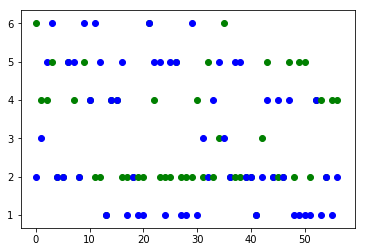

Normalized confusion matrix
[[0.13333333 0.53333333 0.         0.2        0.13333333 0.        ]
 [0.         0.71428571 0.07142857 0.07142857 0.07142857 0.07142857]
 [0.         0.33333333 0.         0.33333333 0.         0.33333333]
 [0.         0.25       0.         0.5        0.25       0.        ]
 [0.         0.5        0.08333333 0.25       0.16666667 0.        ]
 [0.         0.4        0.         0.         0.4        0.2       ]]


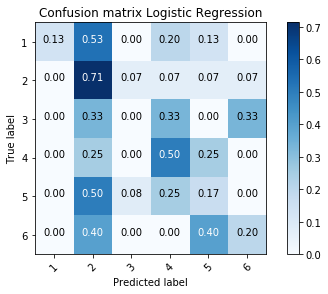

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = lr.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
lr_predictions = lr.predict(X_test) 
cm = confusion_matrix(Y_test, lr_predictions)

for ix in range(lr_predictions.shape[0]):
    plt.scatter(ix, lr_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Logistic Regression')

pickle.dump(lr, open('year_logreg.pkl', 'wb'))

In [61]:
loaded_model = pickle.load(open('year_logreg.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

6 2 50.0
4 3 30.0
4 5 50.0
5 6 25.0
2 2 8.0
2 2 20.0
5 5 40.0
4 5 33.0
2 2 7.0
5 6 100.0
4 4 45.0
2 6 37.0
2 5 100.0
1 1 10.0
4 4 90.0
4 4 215.0
2 5 40.0
2 1 17.0
2 2 25.0
2 1 10.0
2 1 15.0
6 6 40.0
4 5 45.0
2 5 50.0
2 1 35.0
2 5 25.0
5 5 17.0
2 1 7.0
2 1 25.0
2 6 40.0
4 1 12.0
2 3 20.0
5 2 28.0
2 4 20.0
3 5 75.0
6 3 30.0
2 2 27.0
2 5 21.0
2 5 20.0
2 2 14.0
2 2 30.0
1 1 7.0
3 2 3.0
5 4 18.0
2 2 30.0
2 4 20.0
2 2 55.0
5 4 30.0
2 1 30.0
5 1 55.0
5 1 13.0
2 1 12.0
4 4 15.0
4 1 20.0
2 2 10.0
4 1 8.0
4 2 10.0


0.2982456140350877


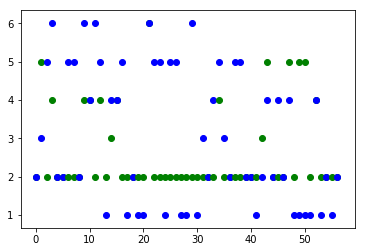

Normalized confusion matrix
[[0.         0.86666667 0.         0.         0.13333333 0.        ]
 [0.         0.92857143 0.07142857 0.         0.         0.        ]
 [0.         0.66666667 0.         0.         0.33333333 0.        ]
 [0.         0.25       0.125      0.375      0.25       0.        ]
 [0.         0.83333333 0.         0.16666667 0.         0.        ]
 [0.         0.4        0.         0.4        0.         0.2       ]]


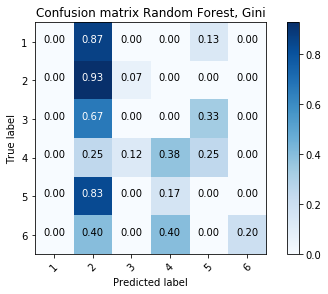

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Random Forest, Gini')

pickle.dump(rf, open('year_randfor.pkl', 'wb'))

In [63]:
loaded_model = pickle.load(open('year_randfor.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

2 2 50.0
5 3 30.0
2 5 50.0
4 6 25.0
2 2 8.0
2 2 20.0
2 5 40.0
2 5 33.0
2 2 7.0
4 6 100.0
4 4 45.0
2 6 37.0
4 5 100.0
2 1 10.0
3 4 90.0
4 4 215.0
2 5 40.0
2 1 17.0
2 2 25.0
2 1 10.0
2 1 15.0
6 6 40.0
2 5 45.0
2 5 50.0
2 1 35.0
2 5 25.0
2 5 17.0
2 1 7.0
2 1 25.0
2 6 40.0
2 1 12.0
2 3 20.0
2 2 28.0
2 4 20.0
4 5 75.0
2 3 30.0
2 2 27.0
2 5 21.0
2 5 20.0
2 2 14.0
2 2 30.0
2 1 7.0
3 2 3.0
5 4 18.0
2 2 30.0
2 4 20.0
2 2 55.0
5 4 30.0
2 1 30.0
5 1 55.0
5 1 13.0
2 1 12.0
4 4 15.0
2 1 20.0
2 2 10.0
2 1 8.0
2 2 10.0


0.24561403508771928


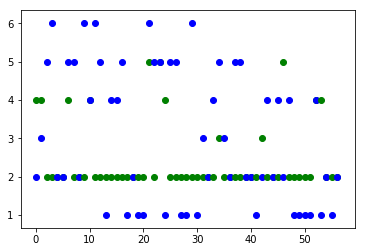

Normalized confusion matrix
[[0.         0.86666667 0.         0.13333333 0.         0.        ]
 [0.         0.78571429 0.07142857 0.07142857 0.07142857 0.        ]
 [0.         0.66666667 0.         0.33333333 0.         0.        ]
 [0.         0.75       0.         0.25       0.         0.        ]
 [0.         0.75       0.08333333 0.08333333 0.08333333 0.        ]
 [0.         0.8        0.         0.         0.2        0.        ]]


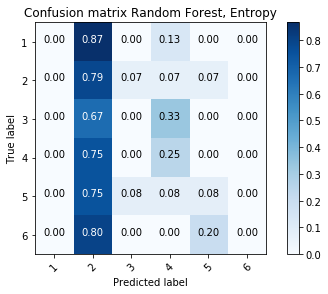

In [64]:
rf = RandomForestClassifier(n_estimators=20, criterion='entropy', warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Random Forest, Entropy')

pickle.dump(rf, open('year_randfor2.pkl', 'wb'))

In [65]:
loaded_model = pickle.load(open('year_randfor2.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)

for i in range(X_test.shape[0]):
    print(result[i], Y_test[i], X_test[i][0])

4 2 50.0
4 3 30.0
2 5 50.0
2 6 25.0
2 2 8.0
2 2 20.0
4 5 40.0
2 5 33.0
2 2 7.0
2 6 100.0
4 4 45.0
2 6 37.0
2 5 100.0
2 1 10.0
2 4 90.0
2 4 215.0
2 5 40.0
2 1 17.0
2 2 25.0
2 1 10.0
2 1 15.0
5 6 40.0
2 5 45.0
5 5 50.0
4 1 35.0
2 5 25.0
2 5 17.0
2 1 7.0
2 1 25.0
2 6 40.0
2 1 12.0
2 3 20.0
2 2 28.0
2 4 20.0
3 5 75.0
2 3 30.0
2 2 27.0
2 5 21.0
2 5 20.0
2 2 14.0
2 2 30.0
2 1 7.0
3 2 3.0
2 4 18.0
2 2 30.0
2 4 20.0
5 2 55.0
2 4 30.0
2 1 30.0
2 1 55.0
2 1 13.0
2 1 12.0
4 4 15.0
4 1 20.0
2 2 10.0
2 1 8.0
2 2 10.0


In [66]:
from sklearn.linear_model import LinearRegression

In [71]:
data2 = ds[['BoxOffice','Target','Budget','Year']]
#data = ds.drop(columns=['Movie', 'BoxOffice', 'Rating', 'Votes', 'Year']).values
print(data2.shape)


(986, 4)


In [ ]:
data2 = data2.values

for x in range(data2.shape[0]):
    data2[x][0] = data2[x][0] + 26

In [81]:
## yearwise split
X_train2 = data2[data2.Year != 2018].drop(columns=['BoxOffice']).values
Y_train2 = data2[data2.Year != 2018].BoxOffice.values + 26

X_test2 = data2[data2.Year == 2018].drop(columns=['BoxOffice']).values
Y_test2 = data2[data2.Year == 2018].BoxOffice.values + 26

print (X_train2.shape, Y_train2.shape)
print (X_test2.shape, Y_test2.shape)

(929, 3) (929,)
(57, 3) (57,)


In [82]:
lm = LinearRegression()
lm.fit(X_train2, Y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
lm.score(X_test2, Y_test2)

0.8200896795243457

In [86]:
y_pred2 = lm.predict(X_test2)
print(y_pred2.shape)
for i in range(y_pred2.shape[0]):
    print(y_pred2[i], Y_test2[i], X_test2[i][1])

(57,)
78.26305740546934 63.0 50.0
62.99339942552939 52.0 30.0
113.73117714501973 105.0 50.0
91.68842802513223 153.0 25.0
21.36909182991019 29.5 8.0
37.62451056578425 32.5 20.0
100.18499486512462 107.0 40.0
90.70266726919817 76.0 33.0
20.014473601920713 30.0 7.0
193.284795124345 368.0 100.0
95.13537942522203 92.0 45.0
107.94384676100617 149.8 37.0
181.46208854449492 201.0 100.0
12.255621706039108 27.75 10.0
156.09319968474983 131.0 90.0
325.4204781834378 328.0 215.0
100.18499486512462 100.0 40.0
21.737949301965614 28.0 17.0
44.397601705731745 34.0 25.0
12.255621706039108 29.0 10.0
19.02871284598666 29.75 15.0
112.00770144497471 134.9 40.0
106.95808600507212 107.0 45.0
113.73117714501973 106.5 50.0
46.1210774057767 30.3 35.0
79.86572144528213 78.0 25.0
69.0287756213661 61.0 17.0
8.191767022070621 26.86 7.0
32.57489512588165 32.95 25.0
112.00770144497471 129.1 40.0
14.964858162018118 27.0 12.0
49.44721714563434 45.2 20.0
48.46145638970029 43.0 28.0
61.26992372548443 46.35 20.0
147.5966328

In [87]:
pickle.dump(lm, open('year_lm.pkl', 'wb'))

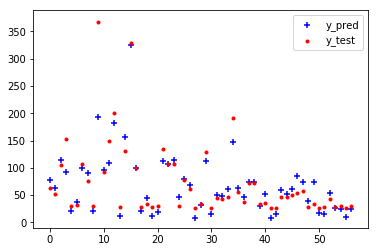

In [89]:
y = range(y_pred2.shape[0])
plt.scatter(y, y_pred2, c='b', marker='+')
plt.scatter(y, Y_test2, c='r', marker='.')
labels = ['y_pred', 'y_test']
plt.legend(labels)

In [65]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

In [83]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(Y_train.shape, y_train.shape)

(690,) (690, 7)


In [84]:
model = Sequential()
model.add(Dense(800, input_shape=(1796,)))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 800)               1437600   
_________________________________________________________________
activation_17 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               160200    
_________________________________________________________________
activation_18 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 50)                10050     
_________________________________________________________________
activation_19 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 357       
__________

In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=[X_test, y_test])

Train on 690 samples, validate on 296 samples
Epoch 1/50
690/690 [==============================] - 7s 10ms/step - loss: 1.9040 - acc: 0.2652 - val_loss: 1.7572 - val_acc: 0.3311
Epoch 2/50
690/690 [==============================] - 4s 5ms/step - loss: 1.6124 - acc: 0.3362 - val_loss: 1.7422 - val_acc: 0.3041
Epoch 3/50
690/690 [==============================] - 3s 5ms/step - loss: 1.2681 - acc: 0.5377 - val_loss: 1.7931 - val_acc: 0.3547
Epoch 4/50
690/690 [==============================] - 3s 5ms/step - loss: 0.8620 - acc: 0.7087 - val_loss: 2.0086 - val_acc: 0.2736
Epoch 5/50
690/690 [==============================] - 3s 5ms/step - loss: 0.5477 - acc: 0.8377 - val_loss: 2.4981 - val_acc: 0.2736
Epoch 6/50
690/690 [==============================] - 3s 5ms/step - loss: 0.3632 - acc: 0.8928 - val_loss: 2.7191 - val_acc: 0.2365
Epoch 7/50
690/690 [==============================] - 3s 5ms/step - loss: 0.2139 - acc: 0.9304 - val_loss: 3.2339 - val_acc: 0.2534
Epoch 8/50
690/690 [=========

In [25]:
final_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote,  year, df_rating, df_genre, df_year, df_runtime, df_dir, df_star], axis=1)

In [29]:
final_df.to_csv('movies_prerelease_full.csv', encoding='utf-8', index=False)

In [31]:
year_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote,  year, df_year], axis=1)
year_df.to_csv('movies_prerelease_year.csv', encoding='utf-8', index=False)

In [34]:
genre_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, df_genre], axis=1)
genre_df.to_csv('movies_prerelease_genre.csv', encoding='utf-8', index=False)

In [35]:
yeargenre_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, year, df_year, df_genre], axis=1)
yeargenre_df.to_csv('movies_prerelease_yeargenre.csv', encoding='utf-8', index=False)

In [36]:
final2_df = pd.concat([movie, df_roiclasses, budget, boxoffice, rating, vote, df_dir, df_star], axis=1)
final2_df.to_csv('movies_prerelease_fullcast.csv', encoding='utf-8', index=False)